## Example notebook to showcase queryint data from the data donation project

Find documentation for all data donation related raw and post processed data at
https://rocs-dbt-docs.netlify.app

particularly https://rocs-dbt-docs.netlify.app/#!/model/model.data_pipelines.vitals_std_by_date_and_user_before_infection

In [16]:
from datascience_template import query_df
from psycopg.sql import SQL

# query rhr relative to reported tests

df = query_df(SQL(
    """
    select 
        v.user_id, 
        v.value_minus_mean_from_value_minus_mean as rhr, 
        (v.date - t.test_week_start) as day, 
        t.f10 test_result
    from 
        datenspende_derivatives.homogenized_features t, 
        datenspende_derivatives.vitals_std_by_date_and_user_before_infection v
    where 
        v.user_id = t.user_id and
        v.type = 65 and
        v.date > t.test_week_start - 10 AND
        v.date < t.test_week_start + 50
    """))
df

/home/jovyan/datascience-template/datascience_template/load_from_postgres.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, conn)
/home/jovyan/.cache/pypoetry/virtualenvs/datascience-template-tAcMKW7H-py3.10/lib/python3.10/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/home/jovyan/.cache/pypoetry/virtualenvs/datascience-template-tAcMKW7H-py3.10/lib/python3.10/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,user_id,rhr,day,test_result
0,1212140,-3.952375,-9,False
1,1212140,-3.952375,26,False
2,1212140,-3.952375,32,False
3,1212140,-3.952375,-2,False
4,1212140,-3.952375,5,False
...,...,...,...,...
22804815,330787,3.704123,22,None
22804816,330787,3.704123,27,None
22804817,330787,3.704123,35,None
22804818,330787,3.704123,43,None


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22804820 entries, 0 to 22804819
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int64  
 1   rhr          float64
 2   day          int64  
 3   test_result  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 695.9+ MB


<AxesSubplot: xlabel='day', ylabel='rhr'>

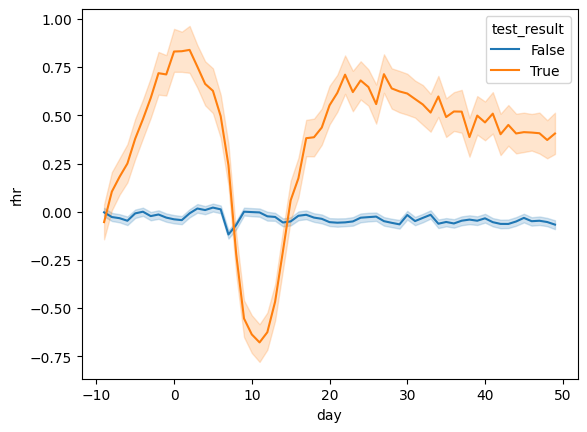

In [18]:
import seaborn as sns

sns.lineplot(data=df, x='day', y='rhr', hue='test_result')